In [1]:
import numpy as np
import matplotlib.pyplot as plt

I came to sudden realization that given set split into overlapping subsets- in this example a group of people split into 4 categories $[F,M] \times [D,N]$
| Gender | Doctors | Nurses |
| --- | --- | --- |
| Female | 90 | 90 |
| Male | 100 | 20 |

You can segment set into 4 regions by:
1. splitting once by horizontal/vertical lines
2. splitting again with diagonal line

In [2]:
NM = 20
NF = 90
DM = 100
DF = 90
totD = DM + DF
totN = NM + NF
totF = DF + NF
totM = DM + NM

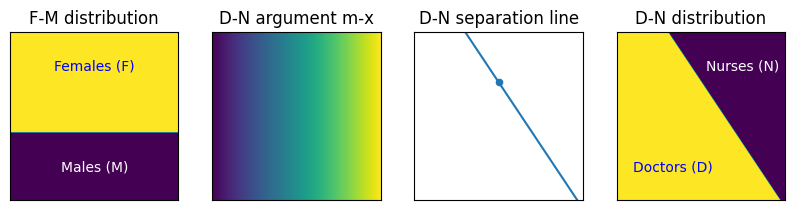

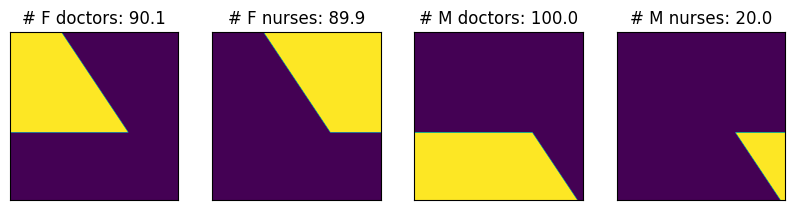

In [5]:
dim = 1000
density = (dim**2)/(totF + totM) # total area per total num of people. 
y_args = np.arange(dim)
gradient_h = np.tile(y_args, (dim,1))
base_mask = np.zeros(shape = (dim, dim), dtype=bool)
masks = {'DN':base_mask.copy(), 'MF':base_mask.copy()}
MF_split_line = int(totF/(totM+totF)*dim)
masks['MF'][:MF_split_line] = True

def line(m, p):
    # y= m*x + b. i set m and intercept point p in space.
    # py = m*px + b -> b = py - m*px
    # y(m,px,py) = m*x + (py - m*px) = m*(x-px) + py
    # invert x(m,px,py) = (y - py + m*px)/m because we filter horizontally not vertically.
    px, py = p
    return (y_args - py + m*px)/m #m*(y_args - px) + py

# since females are equally split into doctors and nurses. only way to split 
# rectangle in two is to slice it though its center.
intercept_point = np.array((dim//2, MF_split_line//2))
test_line = line(1.5, intercept_point).reshape(dim,1)

masks['DN'] = gradient_h <= test_line
fig, ax = plt.subplots(1,4, figsize = (10,3), sharex=True, sharey=False)

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

ax[0].imshow(masks['MF'])
ax[0].text(dim//2, dim //5, 'Females (F)', 
        fontsize = 10, color ="blue", horizontalalignment ='center', verticalalignment ='center')
ax[0].text(dim//2, dim - dim //5, 'Males (M)', 
        fontsize = 10, color ="white", horizontalalignment ='center', verticalalignment ='center')
ax[0].set_title('F-M distribution')
ax[1].imshow(gradient_h)
ax[1].set_title('D-N argument m-x')
ax[2].plot(test_line,y_args)
ax[2].scatter(*intercept_point.reshape([2,1]),s = 20)
ax[2].set_xlim(0, dim)
ax[2].set_ylim(0, dim)
ax[2].invert_yaxis()
ax[2].set_aspect(1)
ax[2].set_title('D-N separation line')
ax[3].imshow(masks['DN'])
ax[3].text(dim//3, dim - dim //5, 'Doctors (D)', 
        fontsize = 10, color ="blue",horizontalalignment ='center', verticalalignment ='center')
ax[3].text(dim - dim //4,dim//5, 'Nurses (N)', 
        fontsize = 10, color ="white",horizontalalignment ='center', verticalalignment ='center');
ax[3].set_title('D-N distribution')


FD =  masks['MF'] *  masks['DN']
FN =  masks['MF'] * ~masks['DN']
MD = ~masks['MF'] *  masks['DN']
MN = ~masks['MF'] * ~masks['DN']

fig2, ax2 = plt.subplots(1,4, figsize = (10,3), sharex=True, sharey=True)

for a in ax2:
    a.set_xticks([])
    a.set_yticks([])

ax2[0].imshow(FD)
ax2[0].set_title(f'# F doctors: {np.sum(FD)/density:0.1f}')
ax2[1].imshow(FN)
ax2[1].set_title(f'# F nurses: {np.sum(FN)/density:0.1f}')
ax2[2].imshow(MD)
ax2[2].set_title(f'# M doctors: {np.sum(MD)/density:0.1f}')
ax2[3].imshow(MN)
ax2[3].set_title(f'# M nurses: {np.sum(MN)/density:0.1f}');

| Gender | Doctors | Nurses |
| --- | --- | --- |
| Female | 90 | 90 |
| Male | 100 | 20 |